
===== Q→SSC (Discharge) =====
Source: 2811 rows × 21 cols
Target: 2726 rows × 21 cols

 Columns:
Source → ['date', '4178000', '4182000', '4183000', '4183500', '4184500', '4185000', '4185318', '4185440', '4186500', '4188100', '4188496', '4189000', '4190000', '4191058', '4191444', '4191500', '4192500', '4192574', '4192599', '4193500']
Target → ['date', '4178000', '4182000', '4183000', '4183500', '4184500', '4185000', '4185318', '4185440', '4186500', '4188100', '4188496', '4189000', '4190000', '4191058', '4191444', '4191500', '4192500', '4192574', '4192599', '4193500']

 Missing Rate:
Source: 0.0 Target: 0.1903364427208888

 Source numeric summary:
           count         mean          std    min     25%     50%     75%  \
4178000  2811.0   653.532337   808.724931   40.1  128.00   330.0   864.0   
4182000  2811.0   859.338385  1450.309113   19.1   77.75   225.0   930.0   
4183000  2811.0  2139.468161  2792.478135  112.0  444.00  1030.0  2535.0   
4183500  2811.0  2326.585557  2958.74723

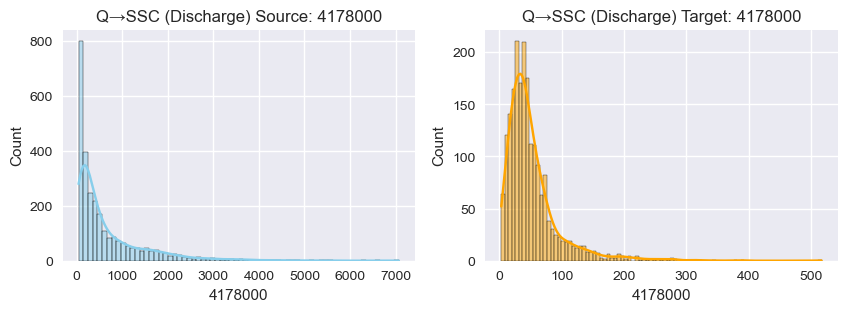

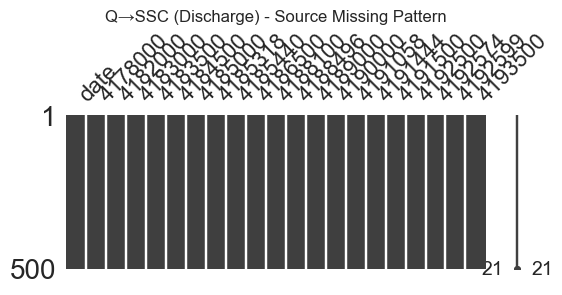

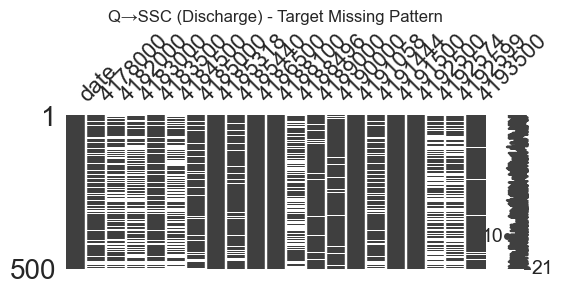


===== NH4→NO3 (Nitrate) =====
Source: 3457 rows × 15 cols
Target: 3457 rows × 15 cols

 Columns:
Source → ['date', '04178000', '04182000', '04183000', '04183500', '04184500', '04185318', '04186500', '04188100', '04188496', '04190000', '04191058', '04191444', '04191500', '04192500']
Target → ['date', '04178000', '04182000', '04183000', '04183500', '04184500', '04185318', '04186500', '04188100', '04188496', '04190000', '04191058', '04191444', '04191500', '04192500']

 Missing Rate:
Source: 0.13776877832417317 Target: 0.13776877832417317

 Source numeric summary:
            count      mean       std    min    25%    50%    75%    max
04178000  2771.0  0.033425  0.034670  0.005  0.020  0.020  0.037  0.479
04182000  2477.0  0.044407  0.055770  0.005  0.020  0.028  0.049  1.130
04183000  1560.0  0.046078  0.033972  0.005  0.025  0.037  0.059  0.341
04183500  3457.0  0.046582  0.063964  0.004  0.020  0.028  0.051  0.786
04184500  2192.0  0.044197  0.059684  0.000  0.020  0.030  0.050  1.460

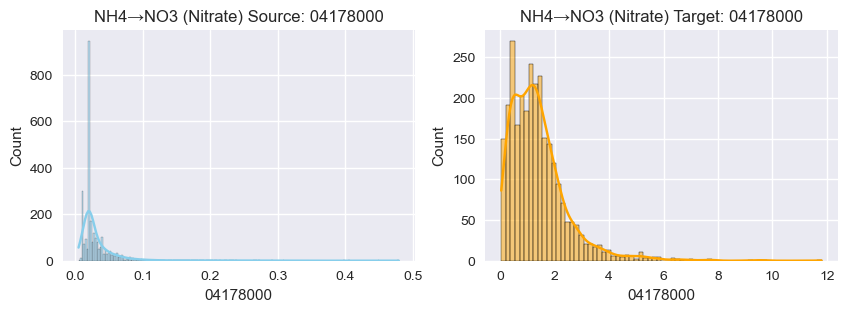

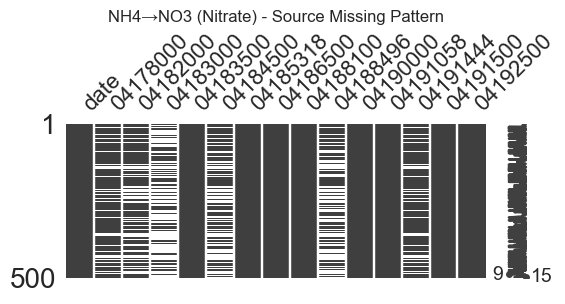

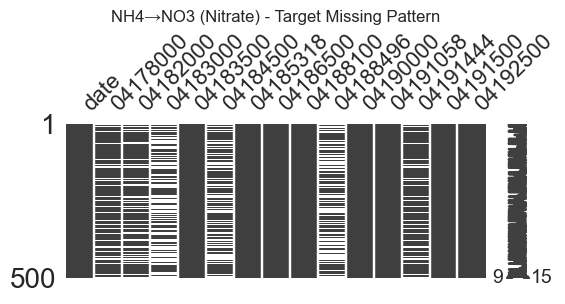


===== SRP→TP (Phosphorus) =====
Source: 3457 rows × 15 cols
Target: 3457 rows × 15 cols

 Columns:
Source → ['date', '04178000', '04182000', '04183000', '04183500', '04184500', '04185318', '04186500', '04188100', '04188496', '04190000', '04191058', '04191444', '04191500', '04192500']
Target → ['date', '04178000', '04182000', '04183000', '04183500', '04184500', '04185318', '04186500', '04188100', '04188496', '04190000', '04191058', '04191444', '04191500', '04192500']

 Missing Rate:
Source: 0.13776877832417317 Target: 0.13782663195448847

 Source numeric summary:
            count      mean       std    min    25%    50%    75%    max
04178000  2771.0  0.046803  0.040489  0.003  0.021  0.038  0.060  0.376
04182000  2477.0  0.121496  0.077230  0.004  0.069  0.113  0.161  0.662
04183000  1560.0  0.122183  0.054062  0.004  0.085  0.120  0.155  0.462
04183500  3457.0  0.112363  0.056651  0.003  0.072  0.111  0.150  0.428
04184500  2192.0  0.025004  0.028186  0.001  0.008  0.017  0.030  0.4

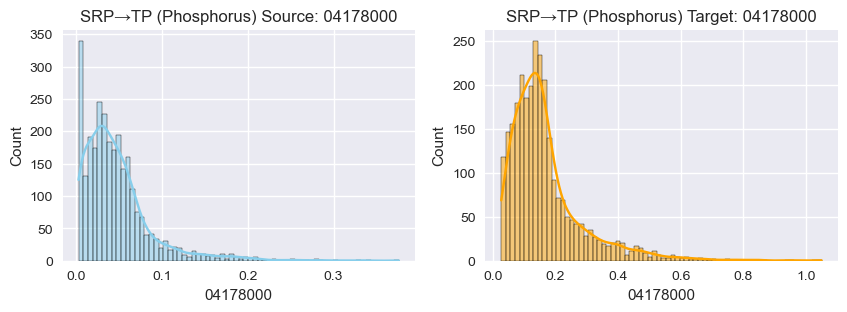

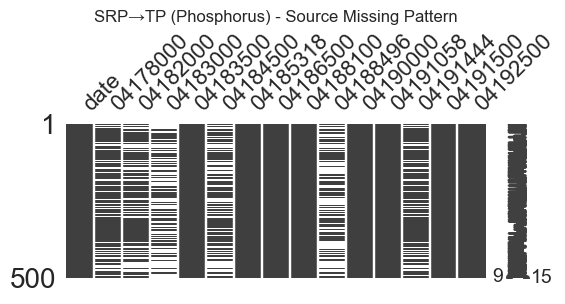

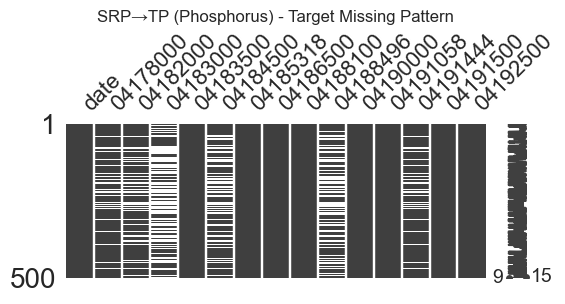

In [4]:
# === 1. Import ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from pathlib import Path

plt.style.use("seaborn-v0_8")
sns.set_palette("coolwarm")

# === 2. Define data paths ===
base = Path("data")

datasets = {
    "Q→SSC (Discharge)": {
        "source": base / "Discharge" / "SSC_discharge.csv",
        "target": base / "Discharge" / "SSC_pooled.csv"
    },
    "NH4→NO3 (Nitrate)": {
        "source": base / "Nitrate" / "NH4_pooled.csv",
        "target": base / "Nitrate" / "NO3_pooled.csv"
    },
    "SRP→TP (Phosphorus)": {
        "source": base / "Phosphorus" / "SRP_pooled.csv",
        "target": base / "Phosphorus" / "TP_pooled.csv"
    },
}

# === 3. EDA Function ===
def summarize_dataset(name, src_path, tgt_path):
    print(f"\n===== {name} =====")
    src = pd.read_csv(src_path)
    tgt = pd.read_csv(tgt_path)
    
    print(f"Source: {src.shape[0]} rows × {src.shape[1]} cols")
    print(f"Target: {tgt.shape[0]} rows × {tgt.shape[1]} cols")
    
    print("\n Columns:")
    print("Source →", list(src.columns))
    print("Target →", list(tgt.columns))
    
    # Missing values
    print("\n Missing Rate:")
    print("Source:", src.isna().mean().mean(), "Target:", tgt.isna().mean().mean())
    
    # Stats summary
    print("\n Source numeric summary:\n", src.describe().T.head())
    print("\n Target numeric summary:\n", tgt.describe().T.head())

    # === Visualization ===
    num_cols_src = src.select_dtypes(include=np.number).columns
    num_cols_tgt = tgt.select_dtypes(include=np.number).columns

    if len(num_cols_src) > 0 and len(num_cols_tgt) > 0:
        fig, axes = plt.subplots(1, 2, figsize=(10, 3))
        sns.histplot(src[num_cols_src[0]].dropna(), kde=True, ax=axes[0], color="skyblue")
        axes[0].set_title(f"{name} Source: {num_cols_src[0]}")
        sns.histplot(tgt[num_cols_tgt[0]].dropna(), kde=True, ax=axes[1], color="orange")
        axes[1].set_title(f"{name} Target: {num_cols_tgt[0]}")
        plt.show()

    # Missingness
    msno.matrix(src.sample(min(500, len(src))), figsize=(6,2))
    plt.title(f"{name} - Source Missing Pattern")
    plt.show()

    msno.matrix(tgt.sample(min(500, len(tgt))), figsize=(6,2))
    plt.title(f"{name} - Target Missing Pattern")
    plt.show()


# === 4. Run EDA ===
for name, files in datasets.items():
    summarize_dataset(name, files["source"], files["target"])


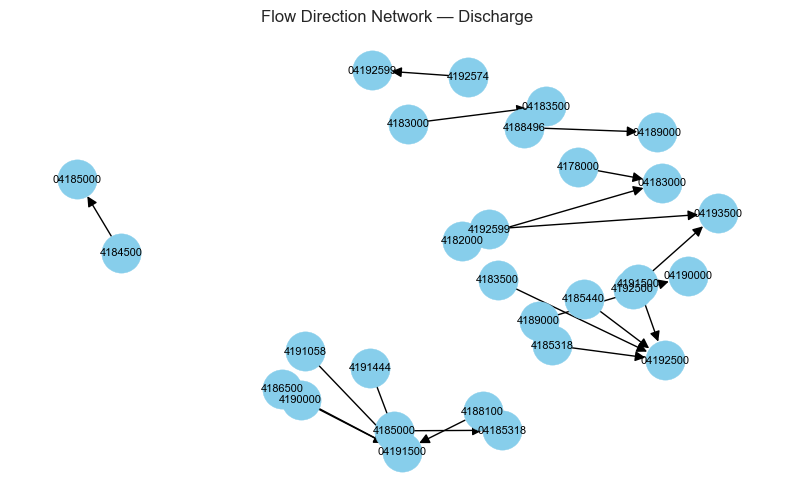

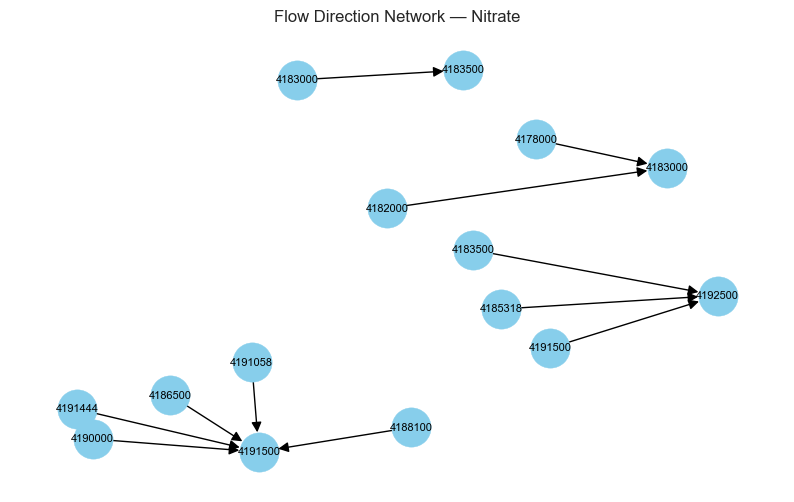

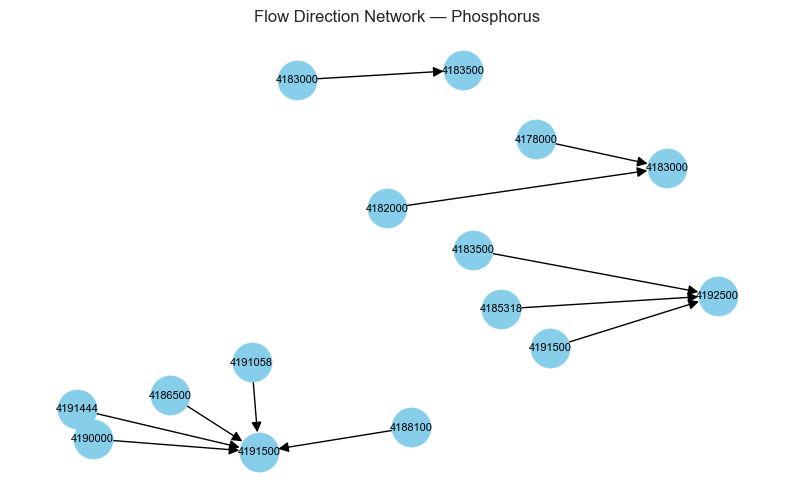

In [2]:
# graphic flow direction
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

files = {
    "Discharge": "data/Discharge/SSC_sites_flow_direction.csv",
    "Nitrate": "data/Nitrate/flow_direction.csv",
    "Phosphorus": "data/Phosphorus/flow_direction_12stations.csv"
}

def plot_flow_direction(file_path, title):
    df = pd.read_csv(file_path, index_col=0)
    G = nx.DiGraph()
    
    for src in df.index:
        for dst in df.columns:
            if df.loc[src, dst] == 1:
                G.add_edge(src, dst)
    
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(G, seed=42, k=0.5) 
    nx.draw_networkx(G, pos, with_labels=True, 
                     node_color='skyblue', 
                     node_size=800, 
                     arrowsize=15, 
                     font_size=8)
    plt.title(f"Flow Direction Network — {title}")
    plt.axis("off")
    plt.show()
for name, path in files.items():
    plot_flow_direction(path, name)
